##### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Import and  examine data

In [2]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [3]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [4]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [5]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [6]:
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [7]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

##### Checking for empty or duplicate values in species df

In [8]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [9]:
species[species.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [10]:
species[species.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


##### Removing duplicates  

In [11]:
species.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


#### Do the same for observations

In [12]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [13]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [14]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [15]:
observations[observations.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


##### Let's calculate the total number of observations for duplicate records and then remove the duplicates

In [16]:
observations['total'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observations.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
observations = observations[['scientific_name', 'park_name', 'total']]
observations = observations.rename(columns={'total': 'observations'})
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


##### Now let's combine both dataframes into one, on the basis of which we will build plots 

In [17]:
observations = pd.merge(observations, species, left_on='scientific_name', right_on='scientific_name', how='left')
observations = observations[['scientific_name', 'park_name', 'observations', 'category', 'conservation_status']]
#observations.to_csv('merged_observations.csv')
#species.to_csv('species_drop_deplicates.csv')

In [18]:
observations.head(10)

,scientific_name,park_name,observations,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,NaN
5,Elymus virginicus var. virginicus,Yosemite National Park,112,Vascular Plant,NaN
6,Spizella pusilla,Yellowstone National Park,228,Bird,NaN
7,Elymus multisetus,Great Smoky Mountains National Park,39,Vascular Plant,NaN
8,Lysimachia quadrifolia,Yosemite National Park,168,Vascular Plant,NaN
9,Diphyscium cumberlandianum,Yellowstone National Park,250,Nonvascular Plant,NaN


In [19]:
observations.category.value_counts()

Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: category, dtype: int64

In [20]:
observations.park_name.value_counts()

Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Bryce National Park                    5541
Name: park_name, dtype: int64

In [21]:
observations.conservation_status.value_counts()

Species of Concern    604
Endangered             60
Threatened             40
In Recovery            12
Name: conservation_status, dtype: int64

### Data Analysis 

First let's look at the number of observations by category

Text(0.5, 1.0, 'Number of observations by category')

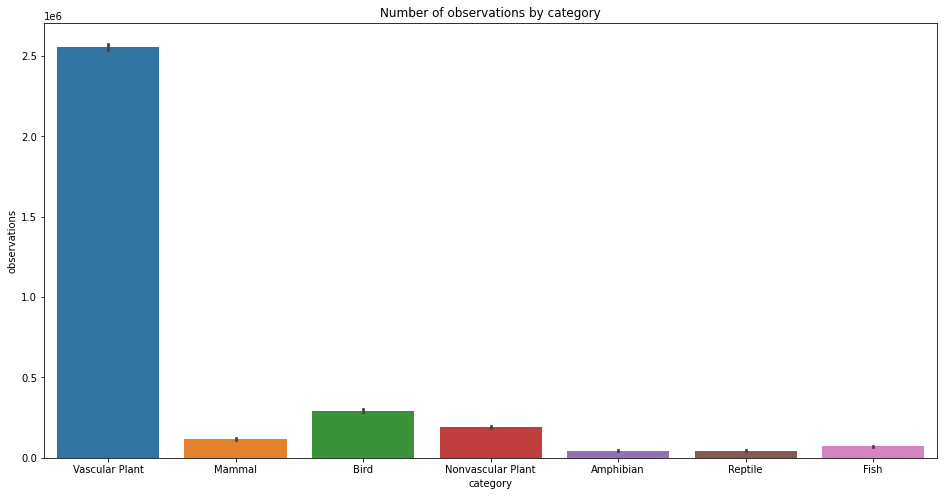

In [22]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=observations, estimator=np.sum)
plt.title('Number of observations by category')

let's see how the different categories and conservation statuses are distributed by parks.

Text(0.5, 1.0, 'Number of observations for each categories by park')

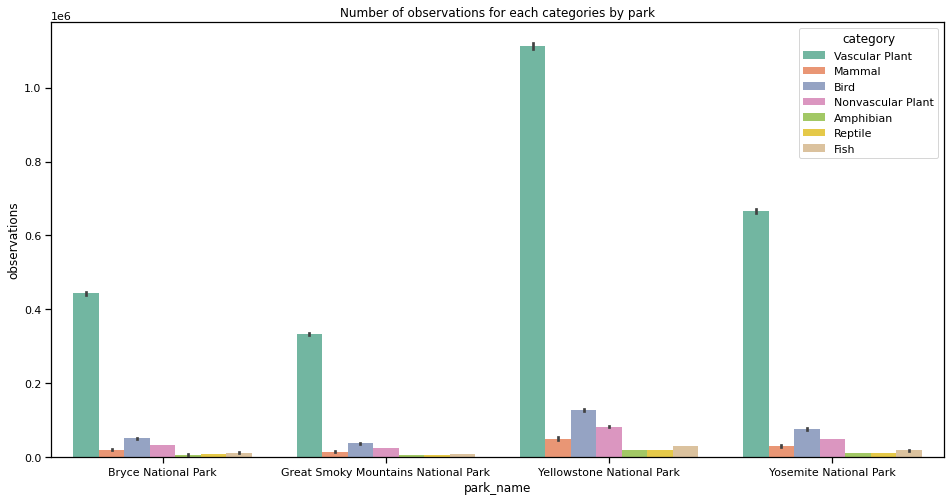

In [23]:
order = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']
sns.set_palette('Set2')
sns.set_context('notebook')
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=observations, hue='category', estimator=np.sum, order=order)
plt.title('Number of observations for each categories by park')

Text(0.5, 1.0, 'Number of observations for each park by category')

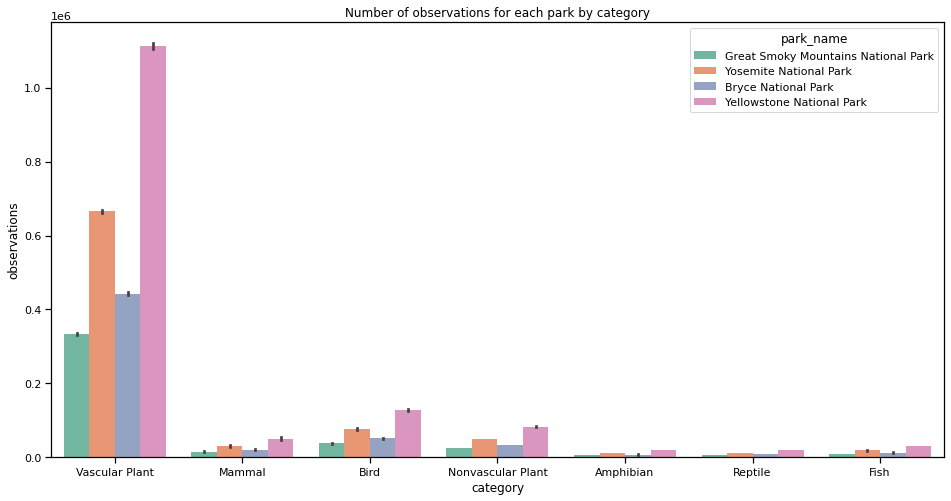

In [24]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=observations, hue='park_name', estimator=np.sum)
plt.title('Number of observations for each park by category')

Text(0.5, 1.0, 'Number of observations for each conservation status by park')

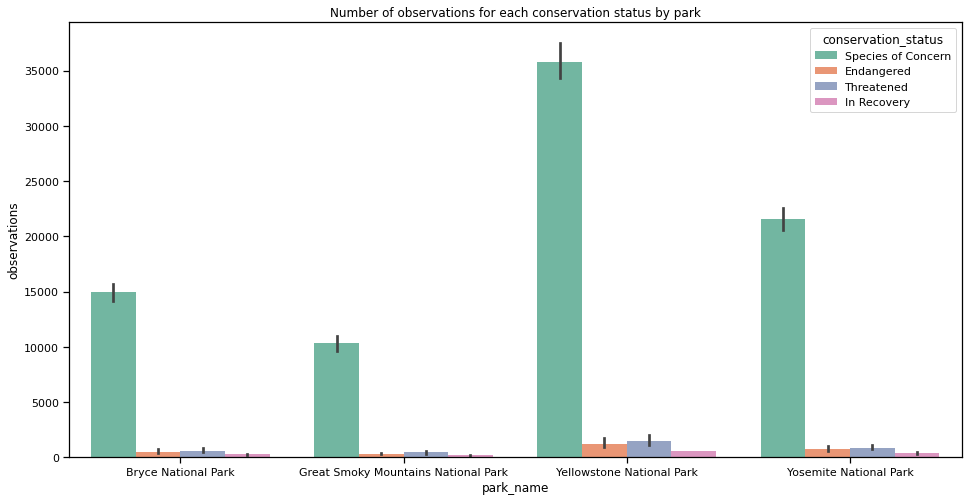

In [25]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=observations, hue='conservation_status', estimator=np.sum, order=order)
plt.title('Number of observations for each conservation status by park')

Let's take a look at the distribution of observations by conservation status

Text(0.5, 1.0, 'Distribution of observations by conservation status')

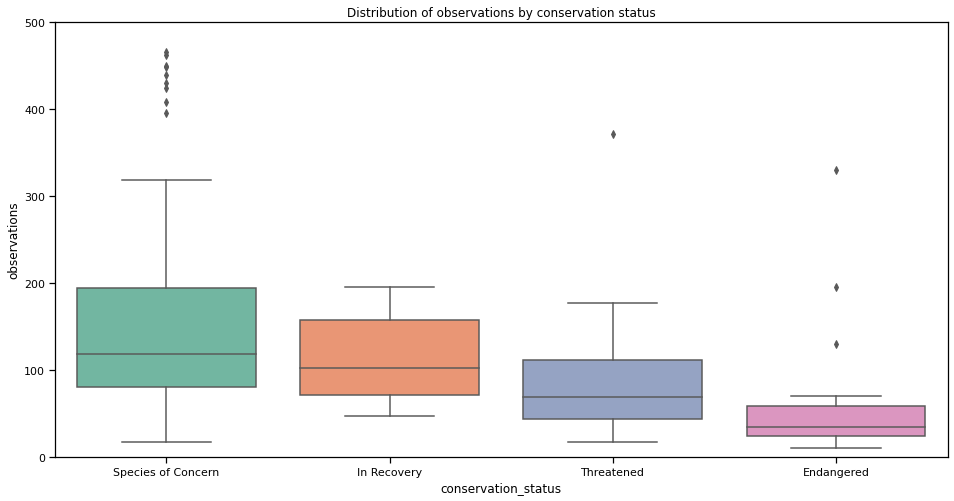

In [26]:
fig = plt.figure(figsize=(16, 8))
order = ['Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x='conservation_status', y='observations', data=observations, order=order)
plt.ylim(0, 500)
plt.title('Distribution of observations by conservation status')

Let's see which categories most often receive conservation status

In [27]:
under_protection = observations[observations.conservation_status.notna()].category.value_counts().reset_index()
under_protection = under_protection.rename(columns={'index': 'category', 'category': 'under protection'})
under_protection

,category,under protection
0,Bird,300
1,Vascular Plant,184
2,Mammal,120
3,Fish,44
4,Amphibian,28
5,Nonvascular Plant,20
6,Reptile,20


and the percentage of protected species from their total number

In [28]:
total_amount = observations.category.value_counts().reset_index().rename(columns={'index': 'category', 'category': 'total amount'})
under_protection = under_protection.merge(total_amount)
under_protection['proportion %'] = round(under_protection['under protection']/under_protection['total amount']*100, 2)
under_protection

,category,under protection,total amount,proportion %
0,Bird,300,1952,15.37
1,Vascular Plant,184,17048,1.08
2,Mammal,120,704,17.05
3,Fish,44,500,8.80
4,Amphibian,28,316,8.86
5,Nonvascular Plant,20,1332,1.50
6,Reptile,20,312,6.41


Text(0.5, 1.0, 'Number of protected species by category ')

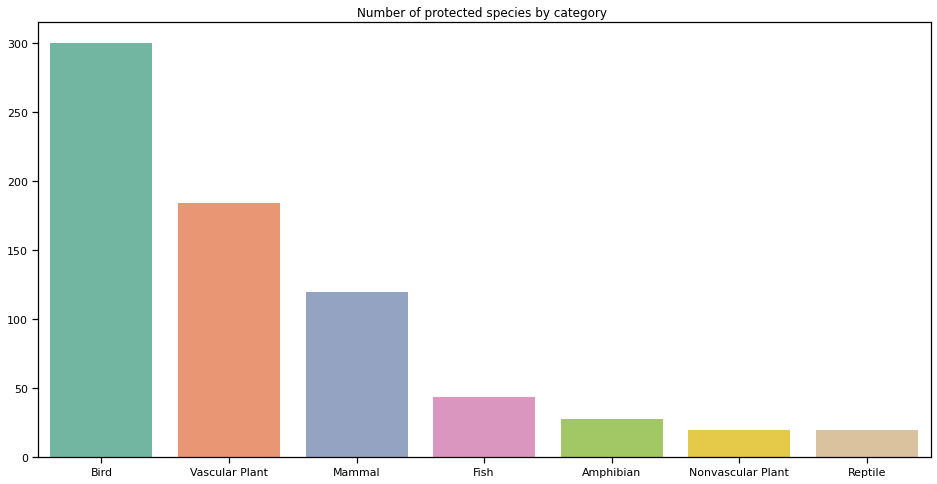

In [29]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='under protection', data=under_protection)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of protected species by category ')

Text(0.5, 1.0, 'Proportions of protected species by category ')

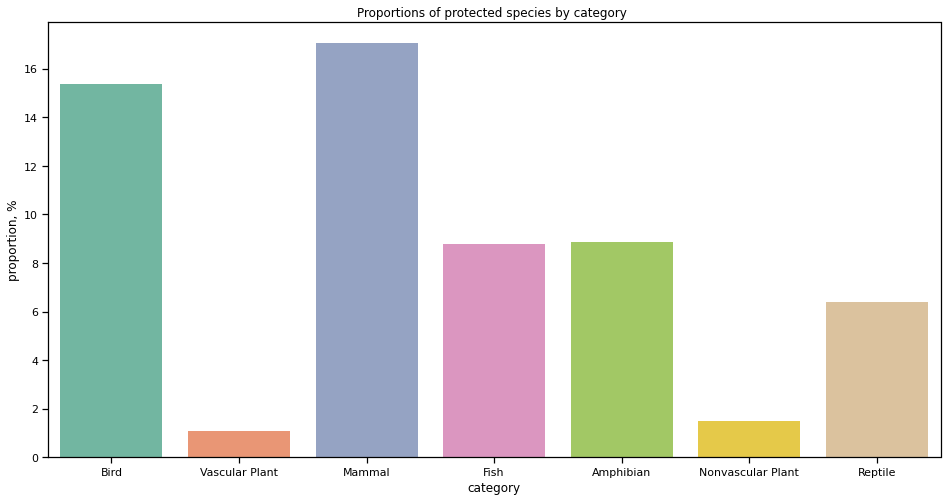

In [31]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='proportion %', data=under_protection)
plt.ylabel('proportion, %')
plt.title('Proportions of protected species by category ')

Let's see how the categories are distributed by conservation statuses

Text(0.5, 1.0, 'Distribution of categories by conservation status')

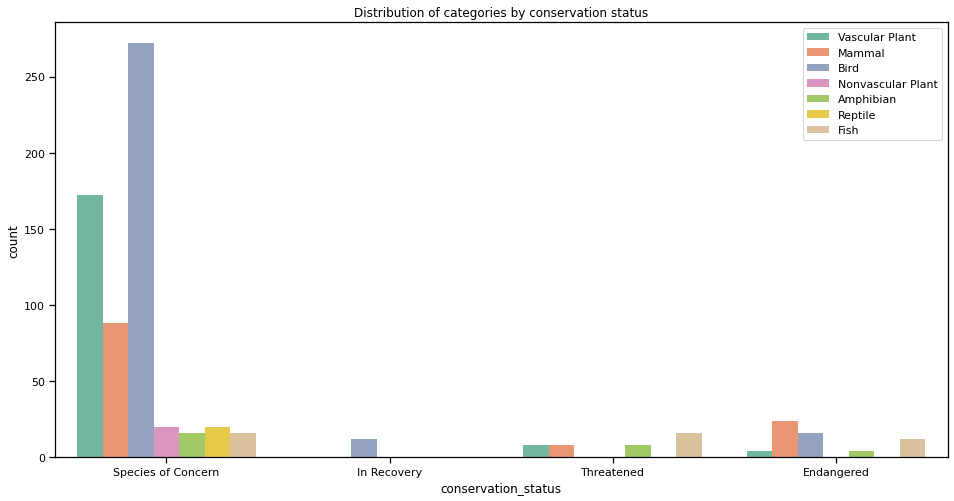

In [32]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='conservation_status', data=observations, hue='category', order=order)
plt.legend(loc='upper right')
plt.title('Distribution of categories by conservation status')

And the opposite picture, how many species belong to each conservation status by category 

Text(0.5, 1.0, 'Number of species by conservation status by category')

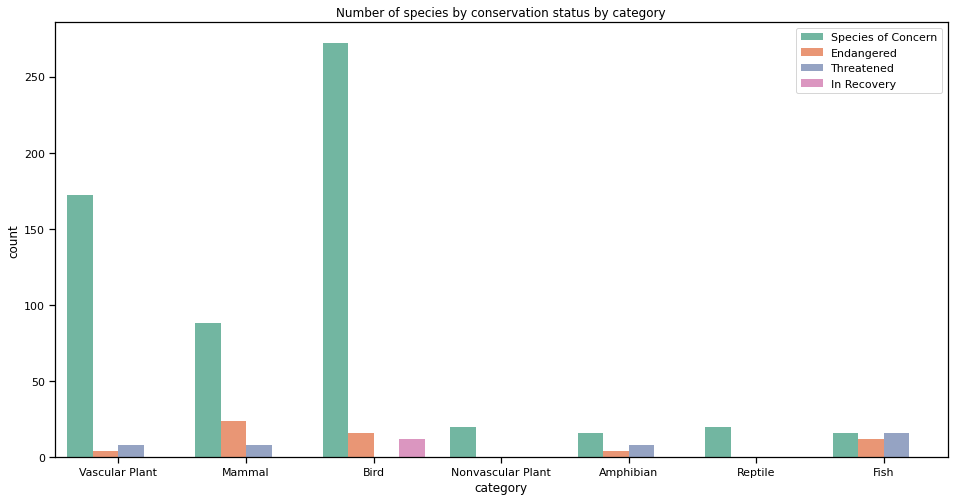

In [35]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='category', data=observations, hue='conservation_status')
plt.legend(loc='upper right')
plt.title('Number of species by conservation status by category')